start running the model from from the cell which hass "start" comment


## Train and save the model

In [ ]:
#4
epochs = 10  # Increase for better accuracy
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.2803
Epoch [2/10], Loss: 0.1453
Epoch [3/10], Loss: 0.1186
Epoch [4/10], Loss: 0.1028
Epoch [5/10], Loss: 0.0984
Epoch [6/10], Loss: 0.0905
Epoch [7/10], Loss: 0.0864
Epoch [8/10], Loss: 0.0820
Epoch [9/10], Loss: 0.0820
Epoch [10/10], Loss: 0.0802


In [ ]:
#5
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 94.62%


In [ ]:
#6
# Save model weights
torch.save(model.state_dict(), "eye_disease_model.pth")

# Save class names so you don’t redefine later
import json
with open("classes.json", "w") as f:
    json.dump(classes, f)

print("Model and classes saved!")


Model and classes saved!


In [ ]:
#download files
from google.colab import files
files.download("eye_disease_model.pth")
files.download("classes.json")

FileNotFoundError: Cannot find file: eye_disease_model.pth

In [ ]:
#7
# Load classes
import json
with open("classes.json", "r") as f:
    classes = json.load(f)

# Rebuild model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(classes))
model.load_state_dict(torch.load("eye_disease_model.pth", map_location=device))
model = model.to(device)
model.eval()

print("Model loaded successfully!")

#8
def predict_image(img_path):
    with Image.open(img_path).convert("RGB") as image:
        image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    return classes[predicted.item()]

# Example
test_img = os.path.join(test_dir, "Glaucoma", "208.jpg")
print("Prediction:", predict_image(test_img))


FileNotFoundError: [Errno 2] No such file or directory: 'classes.json'

## Run the model with a random test image to find the disease and display image

In [ ]:
#1
import kagglehub
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from PIL import Image

#2
# Download dataset
path = kagglehub.dataset_download("dhirajmwagh1111/dataset-for-different-eye-disease")
print("Dataset path:", path)

train_dir = os.path.join(path, "DATASET_101", "Train")
test_dir = os.path.join(path, "DATASET_101", "Test")

# Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Datasets
train_data = datasets.ImageFolder(root=train_dir, transform=transform)
test_data  = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoaders (num_workers=0 for Colab)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=0)
test_loader  = DataLoader(test_data, batch_size=32, num_workers=0)

# Class labels
classes = train_data.classes
print("Classes:", classes)

#3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)

# Freeze feature extractor layers
for param in model.parameters():
    param.requires_grad = False

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, len(classes))
model = model.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()



100%|██████████| 2.34G/2.34G [01:56<00:00, 21.7MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/dhirajmwagh1111/dataset-for-different-eye-disease/versions/1
Classes: ['ACRIMA', 'Glaucoma', 'ODIR-5K', 'ORIGA', 'cataract', 'retina_disease']


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


In [ ]:
#run model from google drive

from google.colab import drive
drive.mount('/content/drive')

import os, json

save_dir = "/content/drive/MyDrive/NER"
os.makedirs(save_dir, exist_ok=True)


# Load classes
with open(os.path.join(save_dir, "classes.json"), "r") as f:
    classes = json.load(f)

# Rebuild the same model architecture
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(classes))

# Load trained weights
model.load_state_dict(torch.load(os.path.join(save_dir, "eye_disease_model.pth"), map_location=device))
model = model.to(device)
model.eval()

print("✅ Model and classes loaded successfully from Google Drive!")
print("Classes:", classes)


from PIL import Image
from torchvision import transforms

# Define the same transform as before
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

def predict_image(img_path):
    with Image.open(img_path).convert("RGB") as image:
        image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    return classes[predicted.item()]

import random

# Pick a random class folder
random_class = random.choice(classes)

# Pick a random image from that folder
class_path = os.path.join(test_dir, random_class)
random_img = random.choice(os.listdir(class_path))

# Full path to image
test_img = os.path.join(class_path, random_img)

# Show and predict
print("Random test image:", test_img)
print("True label:", random_class)
print("Predicted:", predict_image(test_img))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model and classes loaded successfully from Google Drive!
Classes: ['ACRIMA', 'Glaucoma', 'ODIR-5K', 'ORIGA', 'cataract', 'retina_disease']
Random test image: /root/.cache/kagglehub/datasets/dhirajmwagh1111/dataset-for-different-eye-disease/versions/1/DATASET_101/Test/Glaucoma/050.jpg
True label: Glaucoma
Predicted: ORIGA


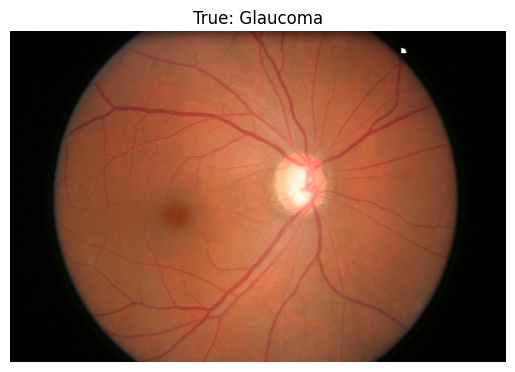

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(test_img)
plt.imshow(img)
plt.title(f"True: {random_class}")
plt.axis("off")
plt.show()